In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

from xgboost import XGBClassifier, plot_importance, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier


In [2]:
X = pd.read_csv('X_train_processed.csv')
y = pd.read_csv('y_train.csv')

In [3]:
X = X.set_index('id')
y = y.set_index('id')

In [4]:
drop_columns = [
    'HRV_MeanNN',
    'HRV_MedianNN',
    'HRV_LF',
    'HRV_LFHF',
    'HRV_LFn',
    'HRV_SDANN1',
    'HRV_SDANN2',
    'HRV_SDANN5',
    'HRV_SDNNI1',
    'HRV_SDNNI2',
    'HRV_SDNNI5',
    'HRV_ULF',
    'HRV_VLF',   
]

In [5]:
X = X.drop(columns=drop_columns)

In [6]:
# X = X.fillna(0)

In [7]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
model = VotingClassifier(
    estimators = [
#         ('rfs',RandomForestClassifier(class_weight='balanced_subsample')),
#         ('rfb',RandomForestClassifier(class_weight='balanced')),
        ('lgb', lgb.LGBMClassifier()),
        ('xgb', XGBClassifier()),
#         ('gbc', GradientBoostingClassifier()),
#         ('bagging', BaggingClassifier()),
#         ('ada', AdaBoostClassifier()),
    ], 
    voting='hard'
)

In [19]:
model.fit(X_train, y_train)

/home/tvinh/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/tvinh/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lgb', LGBMClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimator

In [20]:
# predict the results
y_val_pred = model.predict(X_val)
y_val_pred

array([0, 0, 0, ..., 2, 0, 2])

In [22]:
cm_df = confusion_matrix(y_val, y_val_pred)
cm_df = normalize(cm_df, norm='l1')

In [21]:
# view accuracy
from sklearn.metrics import f1_score
accuracy = f1_score(y_val_pred, y_val, average='micro')
print('Voting Model accuracy score: {0:0.4f}'.format(accuracy))

Voting Model accuracy score: 0.7923


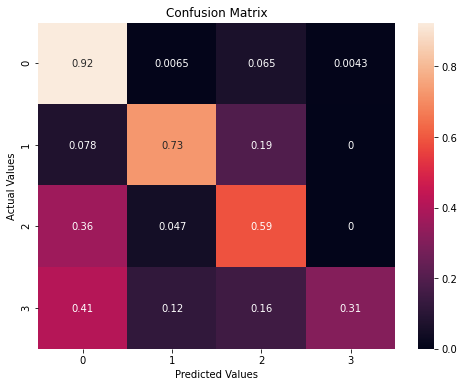

In [23]:
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Output

In [24]:
X_test = pd.read_csv('X_test_processed.csv')
X_test = X_teX_testst.set_index('id')
X_test = X_test.drop(columns=drop_columns)

In [25]:
X_test

,max_P_amplitudes,max_Q_amplitudes,max_S_amplitudes,max_T_amplitudes,mean_P_amplitudes,mean_Q_amplitudes,mean_S_amplitudes,mean_T_amplitudes,median_P_amplitudes,median_Q_amplitudes,...,mean_QRS_complexes,mean_RR_intervals,median_QRS_complexes,median_RR_intervals,min_QRS_complexes,min_RR_intervals,range_QRS_complexes,range_RR_intervals,std_QRS_complexes,std_RR_intervals
id,,,,,,,,,,,,,,,,,,,,,
0,0.531549,0.179880,0.199597,0.736472,0.074236,-0.112863,-0.168166,0.121380,0.086223,-0.072078,...,65.296296,257.258065,64.0,252.0,34.0,237.0,88.0,55.0,21.183178,17.439236
1,0.042463,-0.019025,-0.147887,0.108949,0.014270,-0.048578,-0.171069,0.082278,0.017633,-0.045161,...,103.750000,322.058824,85.5,322.0,70.0,258.0,93.0,113.0,34.493659,20.746284
2,0.550446,0.096264,0.380671,0.635817,0.109733,-0.152480,-0.155309,0.152635,0.058972,-0.066350,...,45.758621,281.142857,39.0,293.5,25.0,120.0,74.0,393.0,19.404328,84.549949
3,0.278700,0.122990,0.246062,0.487158,0.015809,-0.109571,-0.123087,0.250519,0.012388,-0.086154,...,72.307692,289.500000,67.0,290.0,33.0,278.0,90.0,21.0,21.808201,5.267827
4,0.089263,-0.010188,-0.054163,0.024756,0.045820,-0.042404,-0.141374,-0.054647,0.047491,-0.043201,...,58.214286,286.035714,51.5,299.0,39.0,147.0,74.0,172.0,18.750918,39.600218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,0.369004,0.045234,0.131662,0.228154,0.027654,-0.071038,-0.023967,0.030733,0.015660,-0.074759,...,39.804878,206.400000,38.0,212.5,25.0,99.0,41.0,216.0,10.196172,39.713222
3407,0.629933,0.061007,-0.033755,0.698522,0.076451,-0.029421,-0.163547,0.160081,0.031347,-0.027782,...,43.133333,262.774194,42.0,294.0,26.0,93.0,65.0,239.0,10.088718,70.104397
3408,0.282886,0.217028,0.026590,0.603682,-0.035885,-0.104407,-0.298613,0.291647,-0.031877,-0.094118,...,45.714286,227.840580,47.0,228.0,33.0,187.0,27.0,76.0,7.174533,17.218648


In [28]:
y_test = model.predict(X_test)

In [29]:
data_y_test = {
    'id': [i for i in range(len(y_test))],
    'y': y_test
}
df_y_test = pd.DataFrame(data_y_test)
df_y_test.to_csv('y_test.csv', index=False)

In [30]:
df_y_test

,id,y
0,0,0
1,1,2
2,2,0
3,3,0
4,4,0
...,...,...
3406,3406,0
3407,3407,0
3408,3408,0
3409,3409,0
